<a href="https://colab.research.google.com/github/nmack41/NickMackowskicom/blob/main/Google_Maps_API_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
# Import libraries

import pandas as pd
from datetime import datetime
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium
import folium
!pip install branca
import branca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Change working directory

from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/NMcom/Data Science Projects

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/NMcom/Data Science Projects


In [5]:
# Import and read the .csv

df = pd.read_csv('04_29_2022_fast_food_from_10_PROJECT_.csv')

In [ ]:
# Create latitude (lat) and longitude (lon) data from 'coord' column

df['lat'] = df['coord'].apply(lambda x: x.split(',')[0] )
df['lon'] = df['coord'].apply(lambda x: x.split(',')[1])

df['lat'] = df['lat'].str[1:]
df['lon'] = df['lon'].str[:-1]

df['lat'] = df['lat'].astype(float)
df['lon'] = df['lon'].astype(float)

In [7]:
# Let's see if everything is looking good
df.head()

,Unnamed: 0,name,price_level,rating,user_ratings_total,vicinity,Lat,Lon,Unnamed: 8,distance_origin,restaurant,food,point_of_interest,establishment,cafe,store,meal_takeaway
0,0,Chick-fil-A,1,4.4,1288,"2200 Crystal Dr Ste G, Arlington",38.854549,-77.049745,NaN,3.062018,1,1,1,1,0,0,0
1,1,Wendy's,1,4.1,441,"7530 Little River Turnpike, Annandale",38.832662,-77.206024,NaN,10.162344,1,1,1,1,0,0,0
2,2,Chick-fil-A,1,4.4,2236,"6681A Backlick Rd, Springfield",38.773568,-77.183167,NaN,11.651774,1,1,1,1,0,0,0
3,3,Wendy's,1,3.8,381,"6349 Seven Corners, Falls Church",38.868094,-77.151928,NaN,6.531983,1,1,1,1,0,0,0
4,4,Chick-Fil-A,1,4.4,479,"671 N Glebe Rd Ste 1270, Arlington",38.878993,-77.111155,NaN,4.213303,1,1,1,1,0,0,0


In [8]:
# Dropping the Unamed column with NaNs
# df = df.drop(['Unnamed: 0', 'coord'], axis=1)
df = df.drop(['Unnamed: 8'], axis=1)

# Exploratory Data Analysis

In [9]:
# What is the dimension of our dataframe
df.shape

(60, 16)

In [10]:
# Get summary statistics
df.describe()

,Unnamed: 0,price_level,rating,user_ratings_total,Lat,Lon,distance_origin,restaurant,food,point_of_interest,establishment,cafe,store,meal_takeaway
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0,60.0,60.0,60.0,60.000000,60.000000,60.000000
mean,29.500000,1.033333,3.881667,1042.850000,38.906023,-77.055231,5.603530,1.0,1.0,1.0,1.0,0.466667,0.466667,0.066667
std,17.464249,0.181020,0.287886,577.513572,0.068619,0.084586,3.549077,0.0,0.0,0.0,0.0,0.503098,0.503098,0.251549
min,0.000000,1.000000,3.200000,159.000000,38.773568,-77.206024,0.208385,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,14.750000,1.000000,3.700000,583.000000,38.866396,-77.113706,2.631547,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
50%,29.500000,1.000000,3.800000,908.000000,38.899826,-77.046066,5.539805,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
75%,44.250000,1.000000,4.125000,1349.000000,38.951493,-77.020774,8.416790,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
max,59.000000,2.000000,4.400000,3177.000000,39.041778,-76.862041,11.906898,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


In [11]:
# Create map in Python using Folium package. I take the average latitude and longitude, and set the zoom level at 14 to be able to all the markers

m = folium.Map(
    location = [df['Lat'].mean(),df['Lon'].mean() ], zoom_start = 11)

In [12]:
# Adding the origin

whitehouse = {'name': 'White House', 'vicinity': '1600 Pennsylvania Avenue NW, Washington, DC 20500', 'lat':38.8976633, 'lon': -77.0365739 }

In [13]:
# Populate map with markers from all fast food places

for lat,lon, name in zip(df['Lat'], df['Lon'], df['name']):
  m.add_child(folium.Marker(location = [lat,lon], popup=name))

In [14]:
# Add White House as the origin

m.add_child(folium.Marker(location = [whitehouse['lat'], whitehouse['lon']], popup=whitehouse['name'], icon=folium.Icon(color='red')))

In [15]:
# The mean distance from the origin was 5.6 miles. Do fast food places less than 5.6 miles (mean mileage is 5.5) from the origin have higher ratings and higher user reviews?
df_less = df[df['distance_origin'] < 5.5]
df_more = df[df['distance_origin'] >= 5.5]

In [16]:
# Add 5.6 mile radius. I needed to convert 5.5 miles to meters by multiplying by 1609
m.add_child(folium.Circle([whitehouse['lat'], whitehouse['lon']],radius=(5.6 * 1609)).add_to(m))

In [17]:
# Taking a look at summary stats at places less than 5.6 miles

df_less.describe()

,Unnamed: 0,price_level,rating,user_ratings_total,Lat,Lon,distance_origin,restaurant,food,point_of_interest,establishment,cafe,store,meal_takeaway
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0,30.000000,30.000000,30.000000
mean,30.766667,1.066667,3.876667,1063.100000,38.896658,-77.049019,2.589469,1.0,1.0,1.0,1.0,0.433333,0.433333,0.100000
std,16.763432,0.253708,0.308146,448.145093,0.027995,0.044245,1.713080,0.0,0.0,0.0,0.0,0.504007,0.504007,0.305129
min,0.000000,1.000000,3.200000,319.000000,38.842810,-77.131916,0.208385,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,18.250000,1.000000,3.700000,780.750000,38.878611,-77.079059,0.854315,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
50%,31.500000,1.000000,3.800000,947.000000,38.899638,-77.040992,2.495161,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
75%,42.500000,1.000000,4.175000,1342.750000,38.915646,-77.026200,3.952385,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
max,59.000000,2.000000,4.400000,2155.000000,38.948229,-76.953682,5.410428,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


In [18]:
# Taking a look at summary stats at places more than 5.6 miles

df_more.describe()

,Unnamed: 0,price_level,rating,user_ratings_total,Lat,Lon,distance_origin,restaurant,food,point_of_interest,establishment,cafe,store,meal_takeaway
count,30.000000,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.0,30.0,30.0,30.0,30.000000,30.000000,30.000000
mean,28.233333,1.0,3.886667,1022.600000,38.915388,-77.061443,8.617592,1.0,1.0,1.0,1.0,0.500000,0.500000,0.033333
std,18.335350,0.0,0.271310,690.552083,0.092813,0.111887,1.973813,0.0,0.0,0.0,0.0,0.508548,0.508548,0.182574
min,1.000000,1.0,3.500000,159.000000,38.773568,-77.206024,5.669183,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
25%,13.250000,1.0,3.700000,484.000000,38.820358,-77.156565,6.915579,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000
50%,26.500000,1.0,3.800000,872.000000,38.949014,-77.067334,8.473141,1.0,1.0,1.0,1.0,0.500000,0.500000,0.000000
75%,45.500000,1.0,4.075000,1330.000000,38.995602,-76.957607,10.310494,1.0,1.0,1.0,1.0,1.000000,1.000000,0.000000
max,58.000000,1.0,4.400000,3177.000000,39.041778,-76.862041,11.906898,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000


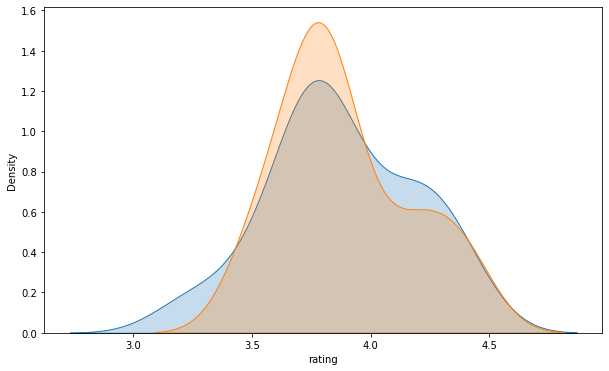

In [19]:
# Let's plot them together.

plt.figure(figsize= (10,6))
sns.kdeplot(df_less['rating'], shade = True)
sns.kdeplot(df_more['rating'], shade = True)

In [20]:
# Let's do a T-test to compare the ratings between places less than 5.6 and more than 5.6 miles away from the White House

summary, results = rp.ttest(group1=df_less['rating'], group1_name="Less5.6",
         group2=df_more['rating'], group2_name="More5.6")

In [21]:
# The answer is that the're almost identical, rating wise.

summary

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Less5.6,30.0,3.876667,0.308146,0.056260,3.761603,3.991730
1,More5.6,30.0,3.886667,0.271310,0.049534,3.785358,3.987976
2,combined,60.0,3.881667,0.287886,0.037166,3.807298,3.956036


In [22]:
# The T-test showed they are similar

results

,Independent t-test,results
0,Difference (Less5.6 - More5.6) =,-0.0100
1,Degrees of freedom =,58.0000
2,t =,-0.1334
3,Two side test p value =,0.8943
4,Difference < 0 p value =,0.4472
5,Difference > 0 p value =,0.5528
6,Cohen's d =,-0.0344
7,Hedge's g =,-0.0340
8,Glass's delta =,-0.0325
9,Pearson's r =,0.0175


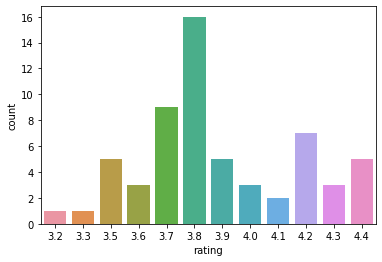

In [23]:
# To dig in a little deeper, it appears that this may have been a poor initial question. The range of ratings goes from 3.2 to 4.4 with the majority of places being rating 3.7 or 3.8. 
sns.countplot(x='rating', data = df )

# Unforunately, that's it for this analysis. This project would be MUCH more interesting if I had a bigger dataset, more details per business (e.g. revenue, expenses, etc.), or data regarding the area (e.g. population density, foot traffic, crime, etc.). If you can think of more potential questions that I can asnwer with this dataset then I will gladly dig in. Thank you for taking a look.